# Overview

This week we'll get started on modern network science. We'll focus on two key results that kick-started a revolution in our understanding of networks.

* Problems with random networks as models for real networks and the Watts-Strogatz model
* Scale-free networks and the Barabasi-Albert model

But before we can get started, there's the bookkeeping stuff, the admin things. Do watch it - the material below tells you about key elements of how to do well in class, assignments and stuff.

## The informal intro (not to be missed)

Today I talk about 
* Recap on admin so far.
* The COVID-19 situation
* The user satisfaction questionnaire
* The assignments
* Forming groups
* Set up the peer evaluation video below

And the good news is that after today, we can take it easy with admin stuff for a while. We'll restart this aspect when we get closer to the project assignments that we finish the class with.

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("ASkdMRs4YH4",width=800, height=450)

# Part 0: The admin stuff 
### (Why we use Peer Evaluations Edition)

We use the system [Peergrade.io](http://peergrade.io/) to get you better feedback and make you smarter. In the video below, I explain why that is the case. There are a lot of good reasons that peer evaluations are great, so watch the video :)

In [2]:
YouTubeVideo("-TC18KgpiIQ",width=800, height=450)

# Part 1: Small world networks

Once again, we'll start with some lecturing. So it's time to watch a little video to get you started.

> **_Video Lecture_**: Some properties of real world networks. Clustering and small paths. The Watts-Strogatz model. 
> 

In [3]:
YouTubeVideo("tMLJ2NYI1FU",width=800, height=450)

Next up is fun with reading the textbook. There's lots of goodies left in Chapter 3 that covers the stuff I've just covered in the video from a slightly different angle. 
> 
> *Reading*: For this part, we'll read the remaining part of *Network Science* Chapter 3, Section 3.5 - 3.10, with ***emphasis*** on 3.8 and 3.9\.
>
> *Exercises*: Did you really read the text? Answer the following questions (no calculations needed) in your IPython notebook. 

---

* What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?

___In a real network, it's much more likely that neighboring connections of a node are actually connections with each other. Therefore, the clustering coefficient is going to be much higher in a real network, than in a random network.___

---

* List the four regimes that characterize random networks as a function of $\langle k \rangle$.

Subcritical regime: 0 < $\langle k \rangle$ < 1 _(no clear giant component)_ <br>
Critical point: $\langle k \rangle$ = 1 _(critical point, above which a giant component exists)_ <br>
Supercritical regime: $\langle k \rangle$ > 1 _(giant component exists, as well as coexisting small, isolated components)_ <br>
Connected regime: $\langle k \rangle$ > $ln(N)$ _(the giant component absorbes all the nodes, meaning that the giant component is the whole network)_ <br>

---

* According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering $C(k)$ decreases as a function of $k$ in real-world networks?

It is a problem, since random networks assume that the probability of a node to be connected to another node decreases as the number of nodes in the network increases, and that such a probability is uniform across all nodes.

However, we have seen that many smaller clusters tend to be grouped as `small-world networks`, where if one node is connected to a second node, there is a high probability that its neighbors will also be connected to the second node, just as groups of friends are highly likely to all be familiar with each other.

In the case of a random network, the clustering coefficient $C(k)$ is independent of the nodes' degrees, and only dependent on the size of the system ($1/N$). For real-world networks, however, it is the other way around, being dependent on the metrics of individual nodes and rather independent from the system size.

Therefore, real-world networks usually have much higher clustering coefficient than expected, for a random network of equal N (size) and L (number of links).

---

The next set of exercises departs from the book by presenting a little study of the Watts-Strogatz (WS) model. We're going to see just how few random links the WS model needs to dramatically shorten the path-lengths in the network. And while doing that, we'll practice using `networkx`, writing loops, and plotting nice figures.

> *Exercises*: WS edition.
> 
> * First, let's use `networkx` to play around with WS graphs. Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1, \textrm{and} 1$.

In [4]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

The three graphs specified are generated below, using the properties of $n$ for number of nodes, $k$ for the average degree of a node, and $p$ for the rewiring probability of a node:

Watts-Strogatz Graph #1 (p = 0):


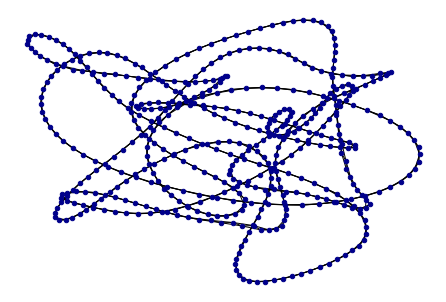

In [5]:
# GRAPH 1:
# n = 500, average degree = 4, probability = 0

graph_p_0 = nx.watts_strogatz_graph(n = 500, k = 4, p = 0)

print("Watts-Strogatz Graph #1 (p = 0):")
nx.draw(graph_p_0, node_size = 20, node_color = "darkblue")

Watts-Strogatz Graph #2 (p = 0.1):


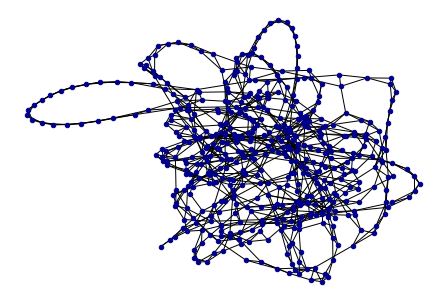

In [6]:
# GRAPH 2:
# n = 500, average degree = 4, probability = 0.1

graph_p_01 = nx.watts_strogatz_graph(n = 500, k = 4, p = 0.1)

print("Watts-Strogatz Graph #2 (p = 0.1):")
nx.draw(graph_p_01, node_size = 20, node_color = "darkblue")

Watts-Strogatz Graph #3 (p = 1):


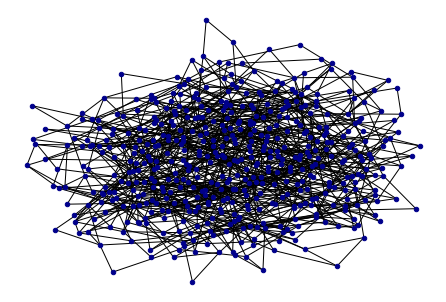

In [7]:
# GRAPH 3:
# n = 500, average degree = 4, probability = 1

graph_p_1 = nx.watts_strogatz_graph(n = 500, k = 4, p = 1)

print("Watts-Strogatz Graph #3 (p = 1):")
nx.draw(graph_p_1, node_size = 20, node_color = "darkblue")

The three graphs above are represented in their simple network representation, using `nx.draw()`. We can also achieve beautiful visualizations regarding the "conectedness" of such graphs using another type of plot called _shell plot_ (done using `nx.draw_shell`).

The same graphs represented above are re-drawn in shell format, just to demonstrate the amount of shortcuts that exists in each of these graphs. As we can see below, this amount increases as the rewiring probability $p$ increases.

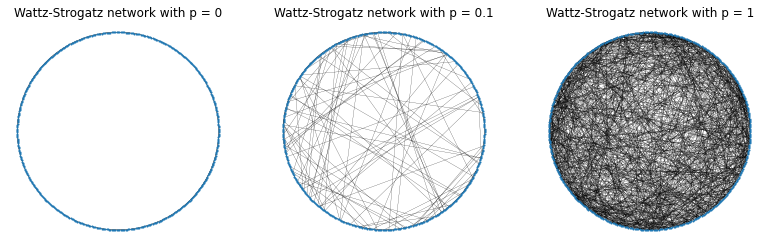

In [8]:
# Draw the three plots next to each other, as shells

plt.figure(figsize = [4.5 * 3, 4])

plt.subplot(1, 3, 1)
nx.draw_shell(graph_p_0, width = 0.2, node_size = 1)
plt.title('Wattz-Strogatz network with p = 0');

plt.subplot(1, 3, 2)
nx.draw_shell(graph_p_01, width = 0.2, node_size = 1)
plt.title('Wattz-Strogatz network with p = 0.1');

plt.subplot(1, 3, 3)
nx.draw_shell(graph_p_1, width = 0.2, node_size = 1)
plt.title('Wattz-Strogatz network with p = 1');

> Calculate the average shortest path length $\langle d \rangle$ for each one.

After the plotting of the three graphs, the average shortest-path length $\langle d \rangle$ will be calculated, for each graph in part:

In [9]:
print("Average shortest path length (<d>) for Watts-Strogatz Graph #1 (p = 0):    " + str(np.round(nx.average_shortest_path_length(graph_p_0), 3)))
# print()
print("Average shortest path length (<d>) for Watts-Strogatz Graph #2 (p = 0.1):  " + str(np.round(nx.average_shortest_path_length(graph_p_01), 3)))
# print()
print("Average shortest path length (<d>) for Watts-Strogatz Graph #3 (p = 1):    " + str(np.round(nx.average_shortest_path_length(graph_p_1), 3)))

Average shortest path length (<d>) for Watts-Strogatz Graph #1 (p = 0):    62.876
Average shortest path length (<d>) for Watts-Strogatz Graph #2 (p = 0.1):  8.008
Average shortest path length (<d>) for Watts-Strogatz Graph #3 (p = 1):    4.799


> Describe what happens to the network when $p = 1$.

First of all, let us understand what the _rewiring probability_ ___$p$___ is referring to, in our Watts-Strogatz networks: <br> 
This value means the probability that an _edge_ is disconnected from one of its two nodes, and randomly connected to a separate node from the network (randomly).

A number of these "rewired" edges will create long-distance connection paths (i.e. _shortcuts_) that facilitate interaction between nodes which are far away from each other. The more shortcuts in a network, the lower its average path length will be. As the probability ___$p$___ increases, edges are more likely to be rewired into creating random paths. 

When ___$p = 1$___, ___every single edge in the network has been disconnected from one node and received a random node to create a path with.___ 

Even though the paths are not fully random (since only 1 out of 2 nodes has been rewired for each edge), we can immediately see that the network resembles an __Erdős–Rényi random network__. The network will contain more random jumps, and the "shortest path length" for the network will be drastically reduced, so that on average we need between 4 and 5 node links to reach any end node from any starting node in the network.

---

> * Generate a lot of networks with different values of $p$. You will notice that paths are short when $p$ is close to one and they are long when $p = 0$. What's the value of $p$ for which the average shortest path length gets close to the short paths we find in a fully randomized network (i.e. the value you find when $p = 1$).

First of all, we need to note that the average shortest path length for a fully randomized network is  $\langle d \rangle = \frac{ln(N)}{ln⟨k⟩}$.

Computing that, we would get that our theoretical "average shortest path length" is:

In [10]:
# Number of nodes in the network
N = 500

# The average degree value
k = 4

# The average shortest path length for a fully randomized network
d = np.log(N) / np.log(k)

print("The average shortest path length for a fully randomized network is:", np.round(d, 3))

The average shortest path length for a fully randomized network is: 4.483


Let us try to generate multiple Watts-Strogatz graphs, with the same number of ___N = 500___ and ___k = 4___, as we have been used to in the previous exercises, except now, we will gradually increase __$p$__ for each graph, in order to see at what value of __$p$__ will the average shortest path length begin to get closer to the value __4.48__, as found in our calculation above.

When the rewiring probability __$p$__ increases, the graph's average shortest path length will be lower and lower, since more network edges will become shortcuts to (potentially) far-reaching places in the network.

In [11]:
N = 500                                                      # Number of nodes in the network
k = 4                                                        # The average degree value
p_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]  # Values of the rewiring probability

for p in p_list:
    graph_ws = nx.watts_strogatz_graph(N, k, p)
    print("Average shortest path length for a Watts-Strogatz network, with rewiring probability %s is: %s" % (p, str(np.round(nx.average_shortest_path_length(graph_ws), 3))))

Average shortest path length for a Watts-Strogatz network, with rewiring probability 0.1 is: 7.437
Average shortest path length for a Watts-Strogatz network, with rewiring probability 0.2 is: 6.174
Average shortest path length for a Watts-Strogatz network, with rewiring probability 0.3 is: 5.412
Average shortest path length for a Watts-Strogatz network, with rewiring probability 0.4 is: 5.136
Average shortest path length for a Watts-Strogatz network, with rewiring probability 0.5 is: 4.985
Average shortest path length for a Watts-Strogatz network, with rewiring probability 0.6 is: 4.821
Average shortest path length for a Watts-Strogatz network, with rewiring probability 0.7 is: 4.829
Average shortest path length for a Watts-Strogatz network, with rewiring probability 0.8 is: 4.786
Average shortest path length for a Watts-Strogatz network, with rewiring probability 0.9 is: 4.723
Average shortest path length for a Watts-Strogatz network, with rewiring probability 1.0 is: 4.746


In most random scenarios, __already starting at a probability $p = 0.5$__ or $p = 0.6$ will the shortest path average be __less than 5.0__. From then on, all higher probabilities than $p = 0.5$ will give a result which is reasonably close the fully randomized network's value of 4.48. 

Since a real path length cannot have decimals (i.e. it is either of length 4 or length 5, but not length 4.5), then we can say that any $p$ value above $p = 0.5$ is good enough to reach a close approximation.

---

> * Let's investigate this behavior in detail. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add [errorbars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html) to the plot. My version of the plot is below (since a picture's worth 1000 words).
> 

![Sune's version](https://raw.githubusercontent.com/suneman/socialgraphs2019/master/files/ws.png)

We have 50 networks which we will generate for each of the 6 distinct values of $p$, therefore, in total, there will be $50 \cdot 6 = 300$ Watts-Strogatz networks generated programatically. We do this through the code below:

In [12]:
N = 500                                   # Number of nodes in the network
k = 4                                     # The average degree value
p_list = [0, 0.01, 0.03, 0.05, 0.1, 0.2]  # Values of the rewiring probability

d_means = []                              # List where we keep the mean of "d" for 50 graphs, for each independent value of p
d_std = []                                # List where we keep the standard deviation of "d" for 50 graphs, for each independent value of p

for p in p_list:
    d_values = []                         # List for keeping the 50 individual values of "d" over the 50 iterations, only across one single value of p
    
    for i in range(0, 50):
        # Generate one (out of 50) Watts-Strogatz graphs
        graph_ws = nx.watts_strogatz_graph(N, k, p)
        
        # Append the average shortest path length of the current graph to our temporary list, for storage purposes
        d_values.append(nx.average_shortest_path_length(graph_ws))
        
    # Here, the 50 graphs have been generated, so we calculate and save the mean and std of the 50-run session in the appropriate lists
    d_means.append(np.mean(d_values))
    d_std.append(np.std(d_values))

The means and standard deviation, collected from our experiment, are plotted in the graph below:

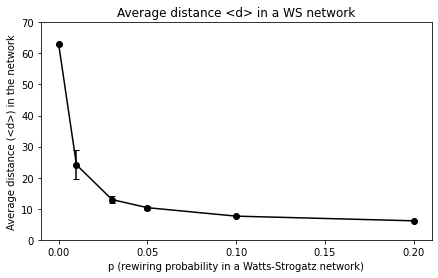

In [13]:
# Set the figure size
plt.figure(figsize=(7, 4))

plt.errorbar(p_list, d_means, d_std, marker = 'o', color = 'black', capsize = 3)
plt.title("Average distance <d> in a WS network")

# Resize the axises for nicer visualisation
plt.ylim(0, 70);
plt.xticks(np.arange(min(p_list), max(p_list) + 0.05, 0.05))
plt.ylabel("Average distance (<d>) in the network")
plt.xlabel("p (rewiring probability in a Watts-Strogatz network)")
plt.show()

__As expected, we can see that even just with $p = 0.01$ (1% rewiring probability), the path length decreases significantly, and already at $p = 0.1$ (10% rewiring probability), the average distance in the network is about 6 times smaller than without any rewiring ($p = 0$).__

---

## Part 2: Scale-free networks

The text book uses two whole chapters on the scale free property. We'll try and power through during the remainder of this lecture. As always, let's start by getting my take on the whole thing.

> **_Video Lecture_**: The scale free property and the Barabasi-Albert Model. 
> 

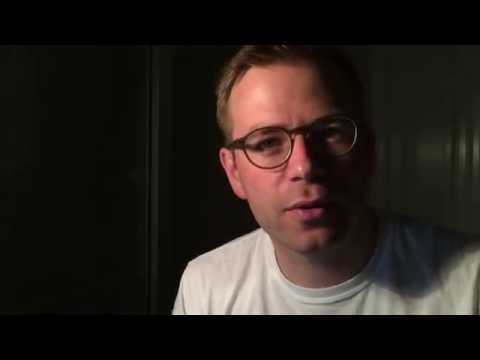

In [14]:
YouTubeVideo("myLgzbXxhOQ",width=800, height=450)

And now it's time for you guys to read. Recall that Barabasi (who wrote the textbook) discovered power-laws.

> *Reading*: Now we dig into the extended history and and theory behind Scale-Free networks and the Barabasi-Albert Model.
> 
> * Chapter 4, Section 4.1 - 4.7\.
> * Chapter 5, section 5.1 - 5.5\.
>
> *Exercises*: BA edition.

First a couple of questions to make sure that you've actually read the text:

---

* What are the three slope dependent regimes of complex networks with power-law degree distributions? Briefly describe each one. (You will have to skim chp 4.7 to answer this one).

1. The anomalous regime is defined when $\gamma \leq 2$. The number of connected links connected to the largest hub $k_{max}$ grows faster than the size of the network N, which it will run out of nodes to connect, hence cannot exist.

2. The scale-free regime is defined when  $2 < \gamma < 3 $. where the first moment, the average degree $<k>$ is finite and the second and higher moments are infinite. The divergence of for example $<k^{2}>$ indicate the lagre fluctuation in node degrees which reflects the property of Scale-free network of containing many hubs and nodes with very few connections.

3. The random regime is defined for $\gamma > 3 $. For large $\gamma$, the degree distribution decays sufficiently fast, thus scale free networks in the random regime is almost same as teh random networks.

---

* What are the three regimes we find in non-linear preferential attachement? (chapter 5) Briefly describe each one.

1. Sublinear. $ 0 < \alpha < 1 $. Sublinear preferential attachment has weak bias towards linking new nodes to more connected nodes. The degrees follow the stretched exponential distribution and the exponential cutoff limits the size and the number of hubs.

2. Linear. $ \alpha = 1 $. Linear preferential attachment follows teh Barabasi-Albert model, hence degree distribution follows a power law.

3. Superlinear. $ \alpha > 1 $ Superlinear preferential attachment has a winner takes it all dynamics where earlier nodes will become super hubs.

---

> We're going to create our own Barabasi-Albert model (a special case) in right in a `notebook`. Follow the recipe below for success
> 
> * First create a graph consisting of a single link. (You can call the nodes anything, but I would simply use integers as names).
> * Now add another node, connecting one of the existing nodes in proportion to their degree.
> * Keep going until you have a 100 node network.
>   * *Hint*: The difficult part here is connecting to each node according to their degree. The way I do it is: generate a list of all edges (e.g. pairs of nodes), then flatten it (e.g. remove connection information). That list contains each node in proportion to its connections, thus drawing a random node from that list (e.g. using `random.choice`) corresponds to selecting a node with probability proportional to its degree.
> * Plot the network. 

In [15]:
import random

Below, we will start by creating a network with a single link (and 2 nodes), after which we will continuously add nodes according to the Barabasi-Albert model:

In [16]:
# Creating a graph consisting of a single link:

graph_ba_1 = nx.Graph()
graph_ba_1.add_edge(0, 1)

In order to facilitate the addition of nodes and properly connecting them proportional to their degree, we have created a function below, which extends a network up to a total number of nodes:

In [17]:
# Adding more nodes, connecting them proportionally to their degree:

def add_nodes_to_BA_network(G, total_nr_of_nodes):
    
    # We will make a copy of the graph, so as not to modify on the original graph
    G_copy = G.copy()
    
    for i in range(0, total_nr_of_nodes):
        
        prop_node_array = np.array(G_copy.edges()).flatten() # This is a NumPy array containing all nodes from all edges in the network (without removing any duplicate nodes)

        random_node = random.choice(prop_node_array)
        G_copy.add_edge(i, random_node)
        
    return G_copy

Using the function created above, let's extend the 2-node simple network to reach 100 nodes (according to a proportional linking model):

In [18]:
# Creating a 100-node Barabasi-Albert network:

graph_ba_100 = add_nodes_to_BA_network(G = graph_ba_1, total_nr_of_nodes = 100)

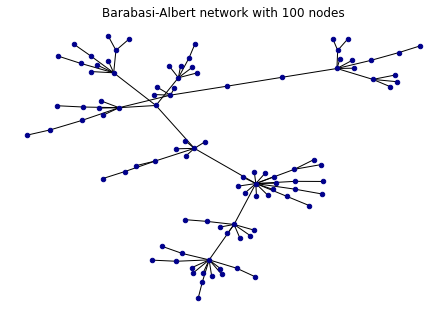

In [19]:
# Plotting the 100-nodes BA network below:

# print("The Barabasi-Albert network presented below has", str(len(graph_ba_100.nodes())), "nodes:")

nx.draw(graph_ba_100, node_size = 20, node_color = "darkblue")
plt.title('Barabasi-Albert network with 100 nodes');

> * Add more nodes until you have a 5000 node network.

Now, we will again "build up" on the previous 100-node network, in order to turn it into a 5000-node Barabasi-Albert network, and plot it below:

In [20]:
# Creating a 5000-node Barabasi-Albert network:

graph_ba_5000 = add_nodes_to_BA_network(G = graph_ba_100, total_nr_of_nodes = 5000)

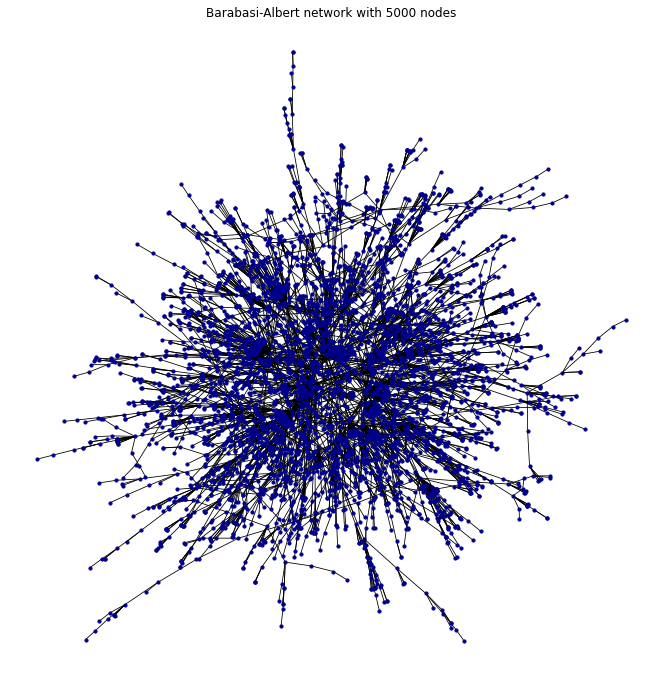

In [21]:
# Plotting the 5000-nodes BA network below:

# print("The Barabasi-Albert network presented below has", str(len(graph_ba_5000.nodes())), "nodes:")

plt.figure(figsize = [9, 9])
nx.draw(graph_ba_5000, node_size = 10, width = 0.8, node_color = "darkblue")
plt.title('Barabasi-Albert network with 5000 nodes');

> * What's the maximum and minimum degree?

In [22]:
ba_node_degree_list = [degree for (node, degree) in graph_ba_5000.degree()]

print('The maximum degree in the 5000-node Barabasi-Albert network is:', np.max(ba_node_degree_list))
print('The minimum degree in the 5000-node Barabasi-Albert network is:', np.min(ba_node_degree_list))

The maximum degree in the 5000-node Barabasi-Albert network is: 121
The minimum degree in the 5000-node Barabasi-Albert network is: 1


__Already from here, we can illustrate that a "hub" in the network clearly exists, having a very large degree.__ 

__Moreover, since the minimum degree in the network is 1, it means that no node is isolated in such a scenario__ (i.e. all nodes are connected into one single cluster).

Let us also plot the degree distribution of the nodes in the network, so that we can also see how this is represented in our example:

> * Now, bin the degree distribution using `numpy.histogram`.
> * Plot the distribution. Plot it with both linear and log-log axes.
> 
> ![Sune's version](https://raw.githubusercontent.com/suneman/socialgraphs2019/master/files/ba.png)

First, we bin the degree distributions, and retrieve the counts for each of the degrees, as well as the actual degree values which are present for our network:

In [23]:
bins = [nr for nr in range(np.min(ba_node_degree_list), np.max(ba_node_degree_list) + 1, 1)]

counts, deg_values = np.histogram(ba_node_degree_list, bins)

Then, we present two plots of the distribution, both in linear scale and log-log scale, similar to the example figure shown above:

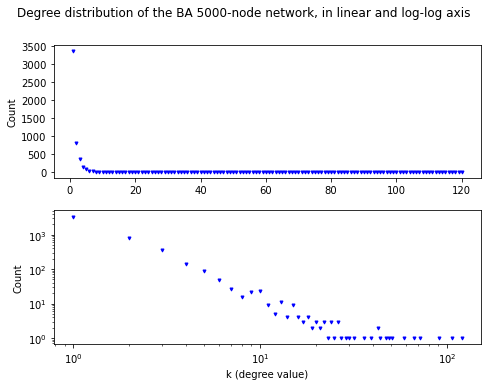

In [24]:
## Plotting the distribution, with both linear and log-log axes.
plt.figure(figsize = [7, 5])
plt.suptitle('Degree distribution of the BA 5000-node network, in linear and log-log axis')

# Plotting the distribution with linear axes
plt.subplot(2, 1, 1);
plt.plot(deg_values[:-1], counts, 'bv', markersize = 3)
plt.xticks(range(0, np.max(deg_values[:-1]) + 20, 20))
plt.yticks(range(0, np.max(counts) + 500, 500))
plt.ylabel('Count')

# Add some small padding between the subplots, to not bump into each other
plt.tight_layout(pad = 1.5)

# Plotting the distribution with log-log axes
plt.subplot(2, 1, 2);
plt.loglog(deg_values[:-1], counts, 'bv', markersize = 3)
plt.xlabel('k (degree value)')
plt.ylabel('Count');

__What we can clearly see from the distribution plots above is that this Barabasi-Albert model behaves according to a power-law distribution, which is a broad distribution, in terms of the degree values present in our network.__

These results also shows that, by using *'preferential attachment'*, there will clearly be a 'hub node' in the network with a much larger degree than almost all of the other nodes.

---

## Part 3: Friendship Paradox

> Next step is to explore the [Friendship paradox](https://en.wikipedia.org/wiki/Friendship_paradox). This paradox states that _almost everyone_ have fewer friends than their friends have, on average\*. This sounds crazy, but is actually an almost trivial consequence of living in a social network with a power-law degree distribution. The explanation is that almost everyone is friends with a hub, that drives up the average degree of the friends. Let's explore that in the 5000 node BA network we've just generated. Do the following:
> 
> * Pick a node $i$ at random (e.g. use `random.choice`). [Find its degree](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.degree.html).

Let's first pick a node at random and compute its degree in the 5000-node BA network:

In [25]:
# Select a node at random from the set of 5000 nodes of the BA graph:
random_node_i = random.choice(list(graph_ba_5000.nodes()))

# Compute its degree:
random_node_degree = graph_ba_5000.degree(random_node_i)

# Print its degree:
print('The degree of the randomly-selected node ("i") is:', random_node_degree)

The degree of the randomly-selected node ("i") is: 1


> * Find $i$'s [neighbors](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.Graph.neighbors.html?highlight=neighbors#networkx.Graph.neighbors). And calculate their average degree.

Now, let's find the average degree of the random node's neighbours:

In [26]:
# Find all neighbors of our random node (in the network)
random_node_i_neighbors = nx.all_neighbors(graph_ba_5000, random_node_i)

# Compute the average of all their degrees
neighbor_degrees = list(dict(graph_ba_5000.degree(random_node_i_neighbors)).values())
average_neighbor_degree = np.mean(neighbor_degrees)

# Print this average degree:
print('The average degree of all the neighbors of our random node "i" is:', average_neighbor_degree)

The average degree of all the neighbors of our random node "i" is: 10.0


> * Compare the two numbers to check if it's true that $i$'s friends (on average) have more friends than $i$.

If the random node has less friends/connections than the average degree of its neighbours, the Friendship Paradox holds for the selected random node. 

Let us check below whether that is the case:

In [27]:
# Testing the hypothesis proposed by the Friendship Paradox:

if (random_node_degree < average_neighbor_degree):
    print('The friendship paradox holds!')
else:
    print('The frienship paradox was not manifested for this random node.')

The friendship paradox holds!


> * Do this 1000 times. How many out of those 1000 times is the friendship paradox true?

It can be seen that the Friendship Paradox did hold in that one-time example.

But if we repeat the exact same experiment 1000 times, how many times will the Friendship Paradox actually hold?

In [28]:
def check_friendship_paradox(G, total_iter):
    
    # Counter for holding the number of times where the Friendship paradox was found to be true:
    fp_counter = 0
    
    for i in range(0, total_iter):
        # Select a node at random from the set of 5000 nodes of the BA graph:
        random_node_i = random.choice(list(G.nodes()))

        # Compute its degree:
        random_node_degree = G.degree(random_node_i)
        
        # Find all neighbors of our random node (in the network)
        random_node_i_neighbors = nx.all_neighbors(G, random_node_i)

        # Compute the average of all their degrees
        neighbor_degrees = list(dict(G.degree(random_node_i_neighbors)).values())
        average_neighbor_degree = np.mean(neighbor_degrees)
        
        # Testing the hypothesis proposed by the Friendship Paradox:
        if (random_node_degree < average_neighbor_degree):
            
            # If the friendship paradox holds, increment the counter:
            fp_counter = fp_counter + 1
            
    return fp_counter

Let's use the function created above to check how many times (out of 1000 times) is the Friendship Paradox true:

In [29]:
total_iter = 1000
total_fp_times = check_friendship_paradox(graph_ba_5000, total_iter)

print('The Friendship Paradox was observed in', total_fp_times, '/', total_iter, 'trials.')

The Friendship Paradox was observed in 857 / 1000 trials.


It seems that, often, the Friendship Paradox seems to happen for $>85\%$ of the total number of trials, meaning that this phenomenon occurs very frequently for nodes inside a network which uses preferential attachment.

> Finally, we'll build a network of same size and degree, using the growth mechanism without the preferential attachment. 
> 
> * Compare to the ER network of same size and same $p$. What are the differences? Explain in your own words. *Hint*: To get started, take a look at the degree distribution, and study the number of connected components.

First, let us create an Erdos-Renyi network with the same number of nodes and the same $p$.

We will do that in the following code:

In [30]:
# The number of nodes we wish for in our Erdos-Renyi network:
N = 5000

# 'ba_node_degree_list' was storing the degree values of all the nodes in the 'graph_ba_5000' network
average_k = np.mean(ba_node_degree_list)

# Let us compute "p", according to the book's formula:
p = average_k / (N - 1)

# Here is the Erdos-Renyi random network, generated with the specified parameters:
graph_er_5000 = nx.erdos_renyi_graph(N, p)

Just like with the Barabasi-Albert network, let us plot the network representation, in order to better understand how the connections are formed:

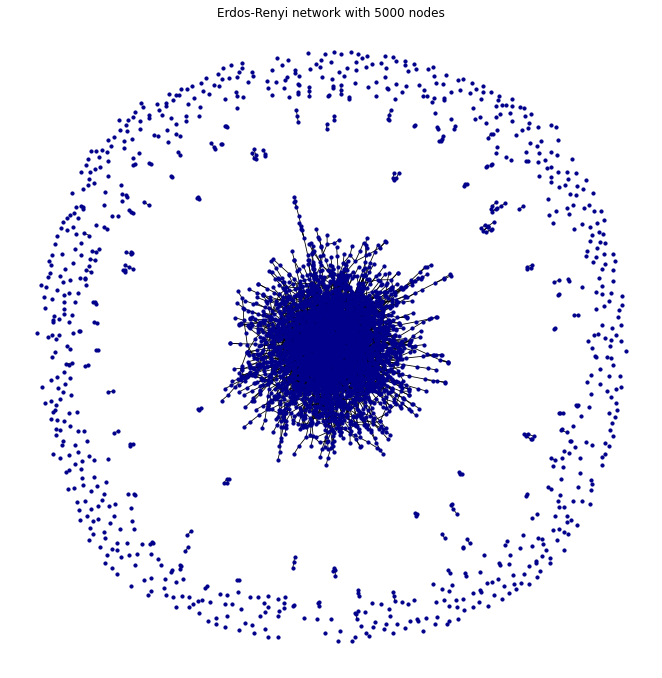

In [31]:
# Plotting the 5000-nodes ER network below:

plt.figure(figsize = [9, 9])
nx.draw(graph_er_5000, node_size = 10, width = 0.8, node_color = "darkblue")
plt.title('Erdos-Renyi network with 5000 nodes');

_One immediate difference between the two types of networks is that **the ER network has a large cluster and multiple isolated nodes, whereas such a thing does not happen inside a BA network.**_

_**In a BA network, all network nodes belong to the main cluster, and there are no isolated nodes with degree = 0. After all, a BA network is a fully-connected graph.**_

Let us also check: 

1. The maximum and minimum degrees of the ER random network;
2. The distribution of degrees across a linear and log-log plot;

since this is exactly what we checked for the BA network, so we have a 1-to-1 means of comparison:

In [32]:
er_node_degree_list = [degree for (node, degree) in graph_er_5000.degree()]

print('The maximum degree in the 5000-node Erdos-Renyi network is:', np.max(er_node_degree_list))
print('The minimum degree in the 5000-node Erdos-Renyi network is:', np.min(er_node_degree_list))

The maximum degree in the 5000-node Erdos-Renyi network is: 9
The minimum degree in the 5000-node Erdos-Renyi network is: 0


Already from here, we see another difference, since the minimum degree in the ER network is allowed to be $0$, whereas in the BA network, the minimum degree will be at least $1$.

Also, the maximum degree in this random network is __much lower__ than in our BA network, since there is no "hub" in the network. 

Let's check the degree distribution plots as well:

In [33]:
bins = [nr for nr in range(np.min(er_node_degree_list), np.max(er_node_degree_list) + 1, 1)]

counts, deg_values = np.histogram(er_node_degree_list, bins)

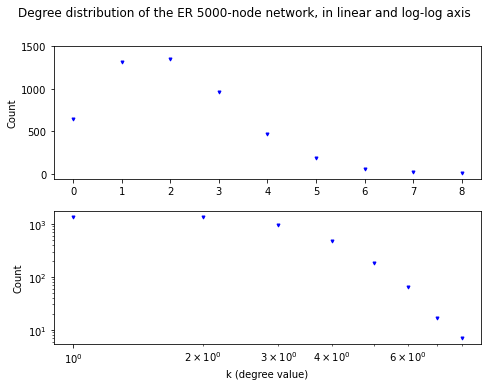

In [34]:
## Plotting the distribution, with both linear and log-log axes.
plt.figure(figsize = [7, 5])
plt.suptitle('Degree distribution of the ER 5000-node network, in linear and log-log axis')

# Plotting the distribution with linear axes
plt.subplot(2, 1, 1);
plt.plot(deg_values[:-1], counts, 'bv', markersize = 3)
plt.yticks(range(0, np.max(counts) + 500, 500))
plt.ylabel('Count')

# Add some small padding between the subplots, to not bump into each other
plt.tight_layout(pad = 1.5)

# Plotting the distribution with log-log axes
plt.subplot(2, 1, 2);
plt.loglog(deg_values[:-1], counts, 'bv', markersize = 3)
plt.xlabel('k (degree value)')
plt.ylabel('Count');

Comparing these plots with the ones from the 5000-node BA network, we see some differences:

1. The degree variance is much higher in the case of a Barabasi-Albert network, due to the way preferential attachment works;
2. The Erdos-Renyi network has the degree values distributed more evenly, compared to the BA network, where most nodes had a degree of 1 (or 2), and very rare cases of degree 3 or above;

Lastly, let us look at the number of connected components in each of these networks:

In [35]:
print('The number of connected components in the 5000-node Barabasi-Albert network is: ', nx.number_connected_components(graph_ba_5000))
print('The number of connected components in the 5000-node Erdos-Renyi network is:     ', nx.number_connected_components(graph_er_5000))

The number of connected components in the 5000-node Barabasi-Albert network is:  1
The number of connected components in the 5000-node Erdos-Renyi network is:      745


The result from checking the number of connected components is a natural conclusion to everything we have discussed so far, since:

1. The reason why the BA network has only 1 connected component is because of the preferential attachment mechanism, which forces all nodes to connect with another node in the network. Thus, all nodes will be connected to the single, main cluster, and there will be no isolated nodes.

2. The number of connected components in the ER network is very large, because the network contains a large number of isolated components or other components of 2-3 connected nodes, which are separated from the main cluster, and which drive the number of components up.